# 向量集合的变换

对于不同坐标系的表示方式 (笛卡尔坐标系, 极坐标系), 适应不同的应用场景, 例如:
- 笛卡尔坐标系更便于进行坐标的平移和缩放
- 极坐标系包含角度, 所以更方便进行坐标的旋转

In [1]:
try:
    import sys
    # 将项目根路径加入系统路径集合, 即可以引入相关的包
    sys.path.append("../..")
finally:
    pass

# 引入所需的包
from common import Vector2D, PolarVector, Number
from common.vector import translate, to_cartesian, to_polar
from common.vector_draw import Color, Points, Polygon, draw
from typing import Iterable
from math import pi


## 1. 极坐标的旋转

在极坐标中, 角度的相加会使向量逆时针旋转, 角度的相减会使向量顺时针旋转. 例如: 极坐标 `(1, 2)` 的距离是 `1`, 角度是 `2` 弧度. (注意: 如果没有角度符号, 单位就是弧度）从 `2` 弧度开始, 加减 `1` 分别使向量逆时针或顺时针旋转 `1` 弧度

**知识:** 加减极坐标的弧度, 可以使坐标绕原点旋转

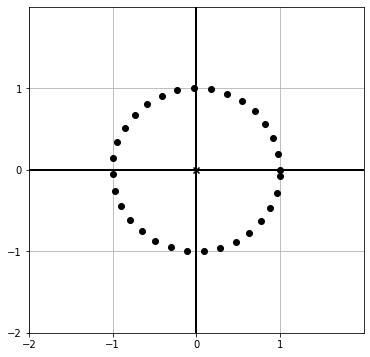

In [2]:
# 按 2pi 弧度 (360°) 产生极坐标集合
vectors = [
    to_cartesian((1, n / 10))
    for n in range(0, int(2 * pi) * 10 + 3, 2)
]

# 绘制极坐标
draw(
    Points(*vectors),
)


**练习:** 将一个笛卡尔坐标向量集合逆时针旋转 `pi/4`

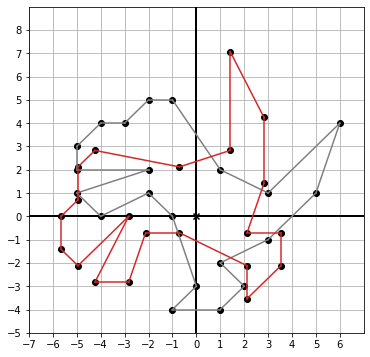

In [3]:
# 定义一个 2D 向量的集合, 由一组二维向量组成
dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]


def to_polar_and_rotate(v: Vector2D) -> PolarVector:
    """
    将笛卡尔坐标转为极坐标, 并进行旋转

    Args:
        v (Vector2D): 将笛卡尔坐标

    Returns:
        PolarVector: 旋转后的极坐标
    """
    # 笛卡尔坐标转为极坐标
    pv = to_polar(v)
    # 返回逆时针旋转 pi / 4 弧度后的极坐标
    return (pv[0], pv[1] + (pi / 4))


# 将集合中的坐标转为极坐标
new_dino_vectors = [
    to_cartesian(to_polar_and_rotate(v))  # 遍历每个笛卡尔坐标, 转为极坐标, 旋转后转回笛卡尔坐标
    for v in dino_vectors
]

# 绘制图形
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors, color=Color.gray),
    Points(*new_dino_vectors),
    Polygon(*new_dino_vectors, color=Color.red),
)


**知识:** 由此可得出坐标旋转的算法: 笛卡尔坐标转为极坐标, 对极坐标中表示弧度的值进行加减, 得到新的极坐标, 再转回笛卡尔坐标

In [4]:
def rotate(radian: Number, vectors: Iterable[Vector2D]):
    def _pipeline(vector: Vector2D) -> Vector2D:
        l, a = to_polar(vector)
        return to_cartesian((l, a + radian))

    return [_pipeline(v) for v in vectors]


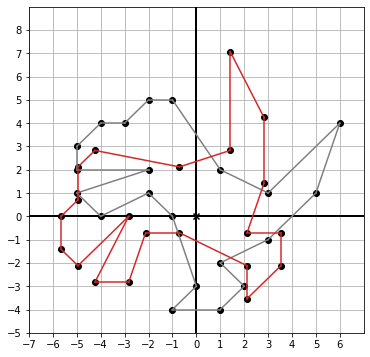

In [5]:
new_dino_vectors = rotate(pi / 4, dino_vectors)

# 绘制图形
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors, color=Color.gray),
    Points(*new_dino_vectors),
    Polygon(*new_dino_vectors, color=Color.red),
)


## 2. 向量的组合操作

借助笛卡尔坐标和极坐标的转换, 可以随意组合向量的旋转, 移动和缩放操作

**知识**: 在坐标旋转的基础上增加移动, 即可组合出更复杂的操作

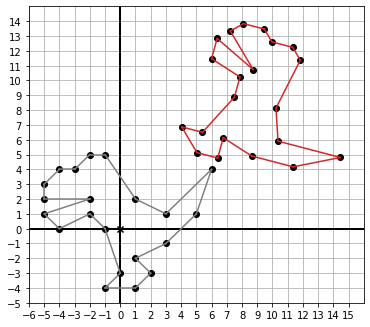

In [6]:
# 组合坐标的旋转和移动, 可以将图形进行组合变换
new_dino_vectors = translate(
    (8, 8),  # 指定要移动的坐标
    rotate(5 * pi / 3, dino_vectors),  # 旋转坐标
)

# 绘制图形
draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors, color=Color.gray),
    Points(*new_dino_vectors),
    Polygon(*new_dino_vectors, color=Color.red),
)


**练习:** 实现函数 `regular_polygon(n)`, 返回一个**规则多边形** (即所有角和边长都相等) 各顶点的笛卡儿坐标. 例如 `polygon(7)` 返回七边形的顶点向量

In [7]:
def regular_polygon(n: int, unit=1) -> Iterable[Vector2D]:
    """
    返回有规则多边形坐标点组成的向量集合

    Args:
        n (int): 多边形的边数
        unit (int, optional): 多边形的顶点长度. Defaults to `1`.

    Returns:
        Iterable[Vector2D]: 组成规则 `n` 边形的向量集合
    """
    return [
        # 将极坐标转为笛卡尔坐标, 弧度为一周弧度的 i / n
        to_cartesian((unit, 2 * pi * (i / n)))
        for i in range(n)
    ]


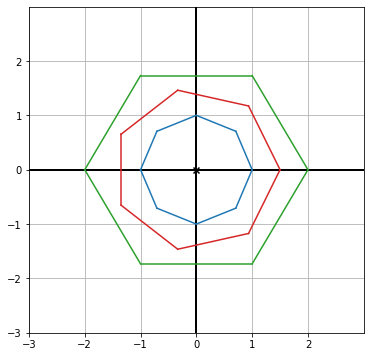

In [8]:
# 产生 6 边形向量集
v1 = regular_polygon(6, unit=2)
# 产生 7 边形向量集
v2 = regular_polygon(7, unit=1.5)
# 产生 8 边形向量集
v3 = regular_polygon(8, unit=1)

# 绘制 3 个规则 n 边形
draw(
    Polygon(*v1, color=Color.green),
    Polygon(*v2, color=Color.red),
    Polygon(*v3, color=Color.blue),
)


**练习:** 向量移动和旋转的顺序, 从结果可知, 旋转前后进行平移的结果是不同的

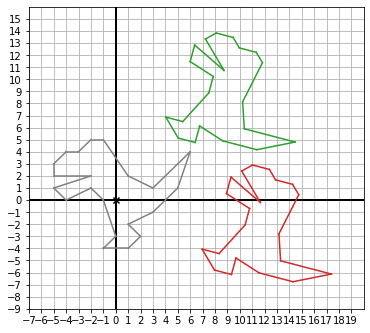

In [9]:
# 先对向量集进行旋转, 在进行平移
new_dino_vectors1 = translate(
    (8, 8),
    rotate(5 * pi / 3, dino_vectors),
)

# 先对向量集进行平移, 在进行旋转
new_dino_vectors2 = rotate(
    5 * pi / 3,
    translate((8, 8), dino_vectors),
)

# 绘制 3 个规则 n 边形
draw(
    # 绘制原始恐龙图形
    Polygon(*dino_vectors, color=Color.gray),
    # 绿色的恐龙是先旋转后平移的结果
    Polygon(*new_dino_vectors1, color=Color.green),
    # 红色的恐龙是先平移后旋转的结果
    Polygon(*new_dino_vectors2, color=Color.red),
)
